<a href="https://colab.research.google.com/github/BautistaDavid/Team-1-Machine-Learning/blob/main/Micronegocios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Exploratorio Encusta de Micronegocios 2019

Analisis Exploratorio de variables estraidas de los Modulos ```identificacion``` y ```ventas_Ingresos``` de la encuesta de Micronegocios 2019 presentada por el DANE.  

## Importación 

* Se importan la libreria ```pandas``` para poder trabajar con las bases de datos resepectivas.
> Notese que se importan las bases de datos usando el argmuneto ```dtype``` para transfromar los dataframes ```"DIRECTORIO" ```,``` "SECUENCIA_ENCUESTA" ```,```"SECUENCIA_P"``` a strings. Lo anterior con el fin de crear una ID para poder realizar un ```merge``` sobre las bases de datos.    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt   
import numpy as np     
import seaborn as sns

In [2]:
identificacion=pd.read_csv("Modulo de identificacion.csv",sep=";",dtype={"DIRECTORIO":str,\
                                                                         "SECUENCIA_ENCUESTA":str,\
                                                                         "SECUENCIA_P":str})        
ventas_ingresos=pd.read_csv("Modulo de ventas o ingresos.csv",sep=";",dtype={"DIRECTORIO":str,\
                                                                         "SECUENCIA_ENCUESTA":str,\
                                                                         "SECUENCIA_P":str})

In [3]:
identificacion.insert(0,"ID",identificacion["DIRECTORIO"]+identificacion["SECUENCIA_ENCUESTA"]+\
                      identificacion["SECUENCIA_P"])
ventas_ingresos.insert(0,"ID",ventas_ingresos["DIRECTORIO"]+ventas_ingresos["SECUENCIA_ENCUESTA"]+\
                      ventas_ingresos["SECUENCIA_P"])

In [4]:
identificacion.head()

,ID,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,COD_DEPTO,AREA,CLASE,P35,P241,MES_REF,P3031,P3032_1,P3032_2,P3032_3,P3033,P3034,P3035,P3000,F_EXP,GRUPOS12,GRUPOS4
0,478012011,4780120,1,1,76,,1,1,22,ENERO,1,1,0,0,1,14,2,1,"295,24240408",12,4
1,478012411,4780124,1,1,76,,1,1,28,ENERO,1,2,0,0,1,108,2,2,"363,25222238",4,4
2,478012511,4780125,1,1,76,,1,1,38,ENERO,2,,,,2,240,2,2,"423,131668",12,4
3,478013811,4780138,1,1,76,,1,1,53,ENERO,2,,,,2,240,2,2,"337,29445917",4,4
4,478014511,4780145,1,1,23,,2,1,42,ENERO,2,,,,2,12,2,2,"201,81828011",4,4


In [5]:
ventas_ingresos.head()

,ID,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,P3057,P3058,P3059,P3060,P3061,P3062,P4002,P3063,P3064,P3065,P3066,P3067,P3092,P3093,P4005,P4006,P4007,P4008,P4009,P4010,P4011,P4012,P4013,P4014,P4015,P4016,P4017,P4018,P3075,P3068_ENE,P3068_1,P3068_FEB,P3068_2,P3068_MAR,P3068_3,P3068_ABR,...,P3068_JUN,P3068_6,P3068_JUL,P3068_7,P3068_AGO,P3068_8,P3068_SEP,P3068_9,P3068_OCT,P3068_10,P3068_NOV,P3068_11,P3068_DIC,P3068_12,P3068_TOD,P3068_NIN,P4019,P4020,P4021,P4022,P4023,P4024,P4025,P4026,P4027,P4028,P4029,P4030,P4031,P4032,P3072,VENTAS_MES_ANTERIOR,VENTAS_MES_ANIO_ANTERIOR,VENTAS_ANIO_ANTERIOR,VALOR_AGREGADO,INGRESO_MIXTO,CLASE,COD_DEPTO,AREA,F_EXP
0,478012011,4780120,1,1,,,,,,,,,0,0,0,0,,,,,,,,,,,1200000,0,0,0,,,1,,,,,,,,...,,,,,,,,,,,,,,,1,,,,,,,,,,10000000,0,0,0,,,500000,0.0,1200000,10000000,-60000.0,-60000.0,1.0,76.0,,"295,24240408"
1,478012411,4780124,1,1,,,,,,,,,0,0,0,0,,,,,,,,,,,2500000,0,0,0,,,1,,,,,,,,...,,,,,,,,,,,,,,,1,,,,,,,,,,39000000,0,0,0,,,1100000,0.0,2500000,39000000,0.0,-1600000.0,1.0,76.0,,"363,25222238"
2,478012511,4780125,1,1,,,,,,,,,1300000,0,0,0,,,,,,,,,,,1100000,0,0,0,,,1,,,,,,,,...,,,,,,,,,,,,,,,1,,,,,,,,,,14760000,0,0,0,,,700000,1300000.0,1100000,14760000,498000.0,498000.0,1.0,76.0,,"423,131668"
3,478013811,4780138,1,1,,,,,,,,,400000,0,0,0,,,,,,,,,,,800000,0,0,0,,,1,,,1,,,,,...,,,,,,,1,,,,,,,,,,,,,,,,,,1000000,0,0,0,,,300000,400000.0,800000,1000000,260000.0,260000.0,1.0,76.0,,"337,29445917"
4,478014511,4780145,1,1,,,,,,,,,60000,0,0,0,,,,,,,,,,,,,,,,,1,,,,,,,,...,,,,,,,,,,,,,,,1,,,,,,,,,,600000,0,0,0,,,80000,60000.0,,600000,60000.0,60000.0,2.0,23.0,,"201,81828011"


In [87]:
datos=pd.merge(identificacion,ventas_ingresos,on="ID",how="outer",suffixes=("","_"))
datos.drop(columns=["DIRECTORIO_","SECUENCIA_ENCUESTA_","SECUENCIA_P_","COD_DEPTO_","AREA_","F_EXP_","CLASE_","F_EXP"],inplace=True)
datos.head()

,ID,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,COD_DEPTO,AREA,CLASE,P35,P241,MES_REF,P3031,P3032_1,P3032_2,P3032_3,P3033,P3034,P3035,P3000,GRUPOS12,GRUPOS4,P3057,P3058,P3059,P3060,P3061,P3062,P4002,P3063,P3064,P3065,P3066,P3067,P3092,P3093,P4005,P4006,P4007,P4008,P4009,P4010,...,P3068_ABR,P3068_4,P3068_MAY,P3068_5,P3068_JUN,P3068_6,P3068_JUL,P3068_7,P3068_AGO,P3068_8,P3068_SEP,P3068_9,P3068_OCT,P3068_10,P3068_NOV,P3068_11,P3068_DIC,P3068_12,P3068_TOD,P3068_NIN,P4019,P4020,P4021,P4022,P4023,P4024,P4025,P4026,P4027,P4028,P4029,P4030,P4031,P4032,P3072,VENTAS_MES_ANTERIOR,VENTAS_MES_ANIO_ANTERIOR,VENTAS_ANIO_ANTERIOR,VALOR_AGREGADO,INGRESO_MIXTO
0,478012011,4780120,1,1,76,,1,1,22,ENERO,1,1,0,0,1,14,2,1,12,4,,,,,,,,,0,0,0,0,,,,,,,,,...,,,,,,,,,,,,,,,,,,,1,,,,,,,,,,10000000,0,0,0,,,500000,0.0,1200000,10000000,-60000.0,-60000.0
1,478012411,4780124,1,1,76,,1,1,28,ENERO,1,2,0,0,1,108,2,2,4,4,,,,,,,,,0,0,0,0,,,,,,,,,...,,,,,,,,,,,,,,,,,,,1,,,,,,,,,,39000000,0,0,0,,,1100000,0.0,2500000,39000000,0.0,-1600000.0
2,478012511,4780125,1,1,76,,1,1,38,ENERO,2,,,,2,240,2,2,12,4,,,,,,,,,1300000,0,0,0,,,,,,,,,...,,,,,,,,,,,,,,,,,,,1,,,,,,,,,,14760000,0,0,0,,,700000,1300000.0,1100000,14760000,498000.0,498000.0
3,478013811,4780138,1,1,76,,1,1,53,ENERO,2,,,,2,240,2,2,4,4,,,,,,,,,400000,0,0,0,,,,,,,,,...,,,,,,,,,,,1,,,,,,,,,,,,,,,,,,1000000,0,0,0,,,300000,400000.0,800000,1000000,260000.0,260000.0
4,478014511,4780145,1,1,23,,2,1,42,ENERO,2,,,,2,12,2,2,4,4,,,,,,,,,60000,0,0,0,,,,,,,,,...,,,,,,,,,,,,,,,,,,,1,,,,,,,,,,600000,0,0,0,,,80000,60000.0,,600000,60000.0,60000.0


* Ahora se puede seleccionar columnas en especifico para generar un DatFrame de analisis, el cual se reindexara y modificarán los codigos de preguntas de las columnas por etiquetas mas faciles de ifentificar. 

In [88]:
datos_analisis=datos[["ID","COD_DEPTO","AREA","CLASE","P35","P241","P3032_1","P3032_2","P3033","P3035","GRUPOS12","GRUPOS4",\
                      "VENTAS_MES_ANTERIOR","VALOR_AGREGADO","INGRESO_MIXTO"]]

In [89]:
datos_analisis=datos_analisis.rename(columns={"P35":"Sexo propietario","P241":"Edad Propietario","P3032_1":"No.Trabajad remun","P3032_2":"No.socios",\
                                              "P3033":"socio-Trabajad","P3035":"Nombre Comercial","GRUPOS12":"Sector CIIU_12","GRUPOS4":"Sector CIIU_4",\
                                              "VENTAS_MES_ANTERIOR":"Ventas ultimo mes","VALOR_AGREGADO":"Valor Agreagado mensual","INGRESO_MIXTO":"Ingreso Mixto"})
datos_analisis.set_index("ID",inplace=True)
datos_analisis.head()

,COD_DEPTO,AREA,CLASE,Sexo propietario,Edad Propietario,No.Trabajad remun,No.socios,socio-Trabajad,Nombre Comercial,Sector CIIU_12,Sector CIIU_4,Ventas ultimo mes,Valor Agreagado mensual,Ingreso Mixto
ID,,,,,,,,,,,,,,
478012011,76,,1,1,22,1,0,1,2,12,4,0.0,-60000.0,-60000.0
478012411,76,,1,1,28,2,0,1,2,4,4,0.0,0.0,-1600000.0
478012511,76,,1,1,38,,,2,2,12,4,1300000.0,498000.0,498000.0
478013811,76,,1,1,53,,,2,2,4,4,400000.0,260000.0,260000.0
478014511,23,,2,1,42,,,2,2,4,4,60000.0,60000.0,60000.0


## Analisis Datos

In [90]:
datos_analisis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86969 entries, 478012011 to 508026131
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   COD_DEPTO                86969 non-null  int64  
 1   AREA                     86969 non-null  object 
 2   CLASE                    86969 non-null  int64  
 3   Sexo propietario         86969 non-null  int64  
 4   Edad Propietario         86969 non-null  int64  
 5   No.Trabajad remun        86969 non-null  object 
 6   No.socios                86969 non-null  object 
 7   socio-Trabajad           86969 non-null  int64  
 8   Nombre Comercial         86969 non-null  int64  
 9   Sector CIIU_12           86969 non-null  int64  
 10  Sector CIIU_4            86969 non-null  int64  
 11  Ventas ultimo mes        59129 non-null  float64
 12  Valor Agreagado mensual  59129 non-null  float64
 13  Ingreso Mixto            59129 non-null  float64
dtypes: float64(3), 

In [91]:
datos_analisis.shape

(86969, 14)

* Se realiza calculos estadisticos Basicos

In [92]:
datos_analisis.describe().drop(columns=["COD_DEPTO","CLASE","Sexo propietario","Nombre Comercial","Sector CIIU_12","Sector CIIU_4"])

,Edad Propietario,socio-Trabajad,Ventas ultimo mes,Valor Agreagado mensual,Ingreso Mixto
count,86969.000000,86969.000000,5.912900e+04,5.912900e+04,5.912900e+04
mean,46.504318,1.876324,2.566033e+06,9.763400e+05,7.272574e+05
std,14.421158,0.329214,8.215239e+06,3.974382e+06,3.840246e+06
min,18.000000,1.000000,0.000000e+00,-2.321350e+08,-2.404555e+08
25%,35.000000,2.000000,3.600000e+05,1.227500e+05,9.900000e+04
50%,47.000000,2.000000,9.000000e+05,4.250000e+05,3.800000e+05
75%,57.000000,2.000000,2.100000e+06,9.700000e+05,8.500000e+05
max,98.000000,2.000000,5.000000e+08,1.950000e+08,1.941000e+08


* Se busca estudiar la participacion de los departamentos dentro de la encuesta de micronegocios del Dane, en pro de posteriormente analizar la distribucion del valor agregado de estos mismos bajo detrminadas condiciones.

De esta manera se plantean Diagramas de barras que denotan los departamentos pertencientes a las regiones de administracion y planificacíon **RAP** con sus respectivas participaciones porcentuales dentro de la Encuesta de Micronegocios 2019.

In [149]:
datos_depto=datos_analisis["COD_DEPTO"].replace({5:"Antioquia",8:"Atlantico",11:"Bogota",13:"Bolivar",15:"Boyaca",\
                        17:"Caldas",18:"Caqueta",19:"Cauca",20:"Cesar",23:"Cordoba",\
                        25:"Cundinamarca",27:"Choco",41:"Huila",44:"La Guajira",47:"Magdalena",\
                        50:"Meta",52:"Nariño",54:"N.Santander",63:"Quindio",\
                        66:"Risaralda",68:"Santander",70:"Sucre",73:"Tolima",76:"Valle del Cauca",
                        88:"San Andres"})

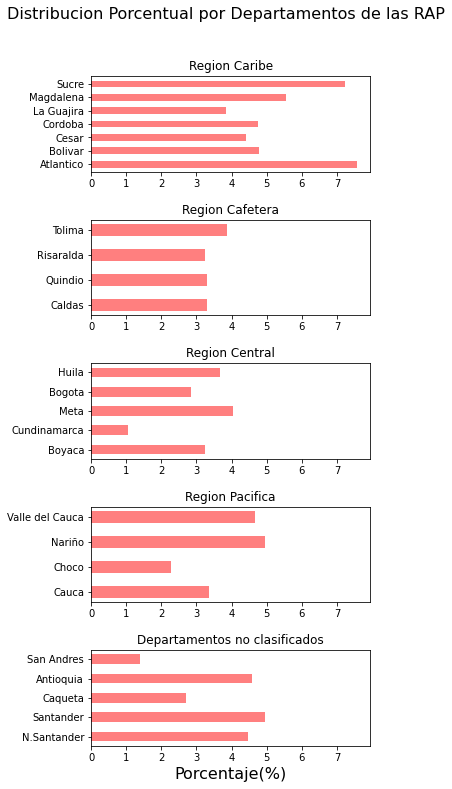

In [150]:

datos=datos_depto.value_counts()

regiones_str=["Region Caribe","Region Cafetera","Region Central","Region Pacifica","Departamentos no clasificados"]
region_caribe=["Atlantico","Bolivar","Cesar","Cordoba","La Guajira","Magdalena","Sucre"]
region_cafetera=["Caldas","Quindio","Risaralda","Tolima"]
region_central=["Boyaca","Cundinamarca","Meta","Bogota","Huila"]
region_pacifica=["Cauca","Choco","Nariño","Valle del Cauca"]
otros_deptos=["N.Santander","Santander","Caqueta","Antioquia","San Andres"]
regiones=[region_caribe,region_cafetera,region_central,region_pacifica,otros_deptos]

fig, ax = plt.subplots(5, sharex=True)
fig.set_size_inches(5,12)
plt.subplots_adjust(hspace = 0.5)
fig.subplots_adjust(top=0.9)
fig.suptitle("Distribucion Porcentual por Departamentos de las RAP", fontsize=16)

for i in range(5):
  ax[i].barh(datos[regiones[i]].index,list(map(lambda x:x*(1/86969),list(datos[regiones[i]].values*100)))\
             ,linewidth=0.1,height=0.5,color="red",alpha=0.5)
  ax[i].set_title(regiones_str[i])
  ax[i].xaxis.set_tick_params(which='both', labelbottom=True)
  
ax[4].set_xlabel("Porcentaje(%)",fontsize=16)

ax[0].xaxis.set_tick_params(which='both', labelbottom=True)
plt.show()


In [152]:
datos_depto_2=pd.DataFrame(datos_depto)
datos_depto_2["Region"]=datos_depto.replace({"Valle del Cauca":"Pacifica","Atlantico":"Caribe",\
                                             "Bogota":"Central","Bolivar":"Caribe","Boyaca":"Central"\
                                             ,"Caldas":"Cafetera","Caqueta":"No clasificado","Cauca":"Pacifica",
                                             "Cesar":"Caribe","Cordoba":"Caribe","Cundinamarca":"Central","Choco":"Pacifica",\
                                             "Huila":"Central","La Guajira":"Caribe","Magdalena":"Caribe","Meta":"Central",\
                                             "Nariño":"Pacifica","N.Santander":"No clasificado","Quindio":"Cafetera",\
                                             "Risaralda":"Cafetera","Santander":"No clasificado","Sucre":"Caribe","Tolima":"Central",\
                                             "Valle del Cauca":"Pacifica","San Andres":"No clasificado","Antioquia":"No clasificado"})
                                           
datos_depto_2["Ingreso_mes"]=datos_analisis["Ventas ultimo mes"]
datos_depto_2

,COD_DEPTO,Region,Ingreso_mes
ID,,,
478012011,Valle del Cauca,Pacifica,0.0
478012411,Valle del Cauca,Pacifica,0.0
478012511,Valle del Cauca,Pacifica,1300000.0
478013811,Valle del Cauca,Pacifica,400000.0
478014511,Cordoba,Caribe,60000.0
...,...,...,...
508024811,Huila,Central,NaN
508024821,Huila,Central,NaN
508025411,Caldas,Cafetera,NaN


In [153]:
datos_depto_2.dropna(axis=0,inplace=True) # drops nahs by axis 0
depto_limpia=datos_depto_2[(datos_depto_2 != 0).all(1)]
depto_limpia.head()

,COD_DEPTO,Region,Ingreso_mes
ID,,,
478012511,Valle del Cauca,Pacifica,1300000.0
478013811,Valle del Cauca,Pacifica,400000.0
478014511,Cordoba,Caribe,60000.0
478014811,Cordoba,Caribe,48000.0
478014831,Cordoba,Caribe,120000.0


In [159]:
por_region=depto_limpia.groupby(["Region"])["Ingreso_mes"].mean()
por_region

Region
Cafetera          2.810429e+06
Caribe            2.430351e+06
Central           3.122168e+06
No clasificado    3.118984e+06
Pacifica          2.494580e+06
Name: Ingreso_mes, dtype: float64

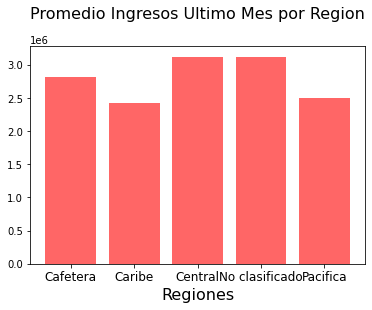

In [198]:
fig,ax=plt.subplots()
ax.bar(por_region.index,por_region.values,color="red",alpha=0.6)
ax.set_title("Promedio Ingresos Ultimo Mes por Region",fontsize=16)
ax.set_xlabel("Regiones",fontsize=16)
plt.xticks(rotation=0,fontsize=12)
ax.title.set_position([.5, 1.1])


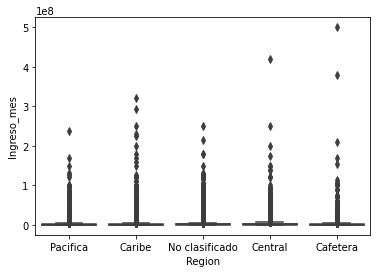

In [154]:
sns.boxplot( x=depto_limpia["Region"], y=depto_limpia["Ingreso_mes"] ,data=depto_limpia)


In [146]:
ejemplo=depto_limpia[["Region","Ingreso_mes"]]
ejemplo.value_counts()

Region     Ingreso_mes
Caribe     1200000.0      778
           600000.0       763
           800000.0       664
           1000000.0      660
           300000.0       616
                         ... 
Central    8100000.0        1
           7596000.0        1
           7440000.0        1
           7400000.0        1
Antioquia  5000.0           1
Length: 5334, dtype: int64

Region
Cafetera          2.810429e+06
Caribe            2.430351e+06
Central           3.122168e+06
No clasificado    3.118984e+06
Pacifica          2.494580e+06
Name: Ingreso_mes, dtype: float64

* Ahora se realiza un Boxplot que permite visualizar la distribución del valor agregado generado por los micronegocios encuestados.

In [47]:
datos_analisis["Ventas ultimo mes"].isnull().sum()

27840

In [30]:
""
datos_depto=datos_depto.replace({"Atlantico":regiones_str[0],"Bolivar":regiones_str[0],"Cesar":regiones_str[0],\
                     "Cordoba":regiones_str[0],"La Guajira":regiones_str[0],"Magdalena":regiones_str[0]\
                     ,"Sucre":regiones_str[0],"Caldas":regiones_str[1],"Quindio":regiones_str[1],"Risaralda"\
                     :regiones_str[1],"Tolima":regiones_str[1],"Boyaca":regiones_str[2],"Cundinamarca":regiones_str[2]\
                     ,"Meta":regiones_str[2],"Bogota":regiones_str[2],"Huila":regiones_str[2],"Cauca":regiones_str[3]\
                     ,"Choco":regiones_str[3],"Nariño":regiones_str[3],"Valle del Cauca":regiones_str[3],\
                     "N.Santander":regiones_str[4],"Santander":regiones_str[4],"Caqueta":regiones_str[4],"Antioquia"\
                     :regiones_str[4],"San Andres":regiones_str[4]})
datos_depto=(pd.DataFrame(datos_depto)).insert(0,"val_agre",datos_analisis["Valor Agreagado mensual"])

In [31]:
datos_depto.head()

AttributeError: ignored

In [ ]:
sns.boxplot( x=df["Valor Agregado mensual"], y=df["sepal_length"],data=datos_depto )

In [ ]:
datos_depto.head(5)

In [ ]:
sum(datos[region_caribe].values)

In [ ]:
for i in range(5):
  print(i)

In [ ]:
region_caribe=["Atlantico","Bolivar","Cesar","Cordoba","La Guajira","Magdalena","Sucre"]

In [ ]:
datos=datos_analisis["COD_DEPTO"].replace({5:"Antioquia",8:"Atlantico",11:"Bogota",13:"Bolivar",15:"Boyaca",\
                        17:"Caldas",18:"Caqueta",19:"Cauca",20:"Cesar",23:"Cordoba",\
                        25:"Cundinamarca",27:"Choco",41:"Huila",44:"La Guajira",47:"Magdalena",\
                        50:"Meta",52:"Nariño",54:"Norte de Santander",63:"Quindio",\
                        66:"Risaralda",68:"Santander",70:"Sucre",73:"Tolima",76:"Valle del Cauca",
                        88:"Archipielago de San Andres"}).value_counts()
                      
(list(datos.values)*100)
result=list(map(lambda x:x*(1/86969),list(datos.values*100)))
result

In [ ]:

datos_analisis.groupby("Sexo propietario")["COD_DEPTO"].mean()

In [ ]:
datos_analisis.AREA.value_counts()

In [ ]:
datos.COD_DEPTO_x.value_counts

In [ ]:
datos_analisis.groupby(["COD_DEPTO","Sexo propietario"])["Ingreso Mixto"].mean()

In [ ]:
?pd.drop_duplicate

In [ ]:
 ventas_ingresos.SECUENCIA_P.value_counts()

In [ ]:
regiones=["region_caribe","region_cafetera","region_central","region_pacifica","otros_deptos"]
regiones[0]

In [ ]:
ventas_ingresos.shape

In [ ]:
datos=pd.merge(identificacion,ventas_ingresos,on="directorio",how="right")        # unemos las dos tablas 
datos.head

In [ ]:
datos=datos.drop(columns=['SECUENCIA_ENCUESTA_x','SECUENCIA_P_x',
 'P35','MES_REF','SECUENCIA_ENCUESTA_y',"F_EXP_x",'P4005','P4006','P4007','P4008','P4009',\
 'P4010','P4011','P4012','P4013','P4014','P4015','P4016','P4017','P4018','P3075',\
 'P3068_ENE','P3068_1','P3068_FEB','P3068_2','P3068_MAR','P3068_3','P3068_ABR',\
 'P3068_4','P3068_MAY','P3068_5','P3068_JUN','P3068_6','P3068_JUL','P3068_7',\
 'P3068_AGO','P3068_8','P3068_SEP','P3068_9','P3068_OCT','P3068_10','P3068_NOV',\
 'P3068_11','P3068_DIC','P3068_12','P3068_TOD','P3068_NIN','P4019','P4020','P4021',\
 'P4022','P4023','P4024','P4025','P4026','P4027','P4028','P4029','P4030','P4031',\
 'P4032','P3072','AREA_y',\
 'F_EXP_y',"SECUENCIA_P_y","VENTAS_MES_ANIO_ANTERIOR","VENTAS_ANIO_ANTERIOR","P3057",\
 "P3058","P3059",	"P3060",	"P3061",	"P3062",	"P4002",	"P3063",	"P3064",	"P3065",\
 	"P3066",	"P3067","P3092","P3093","DIRECTORIO_x"])

In [ ]:
datos.head(7)

In [ ]:
datos=datos.replace(r'^\s+$', np.nan, regex=True)
datos.head(7)

In [ ]:
plt.hist(datos.COD_DEPTO_x.value_counts(normalize=True))

In [ ]:
datos.VALOR_AGREGADO.value_counts

In [ ]:
datos

In [ ]:
prueba=pd.read_csv("Modulo de identificacion.csv",sep=";")
prueba

In [ ]:
list(datos.columns)

In [ ]:
tabla1={"nombre":["juan","pedro","angie"],
        "dinero":[300,400,500]}
tabla2={"nombre":["pedro","juan","angie","juanca"],
        "color_fav":["negro","rojo","azul","amarillo"]}
tabla11=pd.DataFrame(tabla1)
tabla22=pd.DataFrame(tabla2)

In [ ]:
ejemplo=pd.merge(tabla11,tabla22,on="nombre",how="outer")

In [ ]:
tabla11

In [ ]:
tabla22

In [ ]:
ejemplo.index(["APELLIDO","rana","sapo"])

In [ ]:
def hola():
  '''Esta función Saluda'''
  x="hola"
  print(x)

In [ ]:
hola()

In [ ]:
np.arange(25)